# 01 Importing Libraries and Data Q1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.0'

In [3]:
# Assigning a path
path = r'/Users/dramblys/Desktop/Achievement 6/World Happiness Project'

In [4]:
# Import Data
df_whp=pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHP.csv'))

In [5]:
%matplotlib inline

In [6]:
df_whp.shape

(2089, 12)

# 02 Exploring relationships

### 2.1 Creating correlation matrix heatmap Q3

In [7]:
df_whp.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government'],
      dtype='object')

In [8]:
# Create a subset excluding the "Country name" and "year" columns Q2

sub = df_whp[['Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government']]

In [9]:
sub

Life Ladder  Log GDP per capita  Social support  \
0        3.723590            7.302574        0.450662   
1        4.401778            7.472446        0.552308   
2        4.758381            7.579183        0.539075   
3        3.831719            7.552006        0.521104   
4        3.782938            7.637953        0.520637   
...           ...                 ...             ...   
2084     3.638300            8.241609        0.754147   
2085     3.616480            8.274620        0.775388   
2086     2.693523            8.196998        0.759162   
2087     3.159802            8.117733        0.717243   
2088     3.154578            8.153248        0.685151   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                            50.500000                      0.718114   
1                            50.799999                      0.678896   
2                            51.099998                      0.600127   
3                            51.400002                      0.495901   
4                            51.700001                      0.530935   
...                                ...                           ...   
2084                         52.150002                      0.752826   
2085                         52.625000                      0.762675   
2086                         53.099998                      0.631908   
2087                         53.575001                      0.643303   
2088                         54.049999                      0.667636   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  \
0       0.173169                   0.881686         0.414297         0.258195   
1       0.195469                   0.850035         0.481421         0.237092   
2       0.125859                   0.706766         0.516907         0.275324   
3       0.167723                   0.731109         0.479835         0.267175   
4       0.241247                   0.775620         0.613513         0.267919   
...          ...                        ...              ...              ...   
2084   -0.113937                   0.751208         0.733641         0.224051   
2085   -0.084747                   0.844209         0.657524         0.211726   
2086   -0.081540                   0.830652         0.658434         0.235354   
2087   -0.029376                   0.788523         0.660658         0.345736   
2088   -0.109439                   0.756945         0.609917         0.241682   

      Confidence in national government  
0                              0.612072  
1                              0.611545  
2                              0.299357  
3                              0.307386  
4                              0.435440  
...                                 ...  
2084                           0.682647  
2085                           0.550508  
2086                           0.456455  
2087                           0.577302  
2088                           0.665703  

[2089 rows x 10 columns]

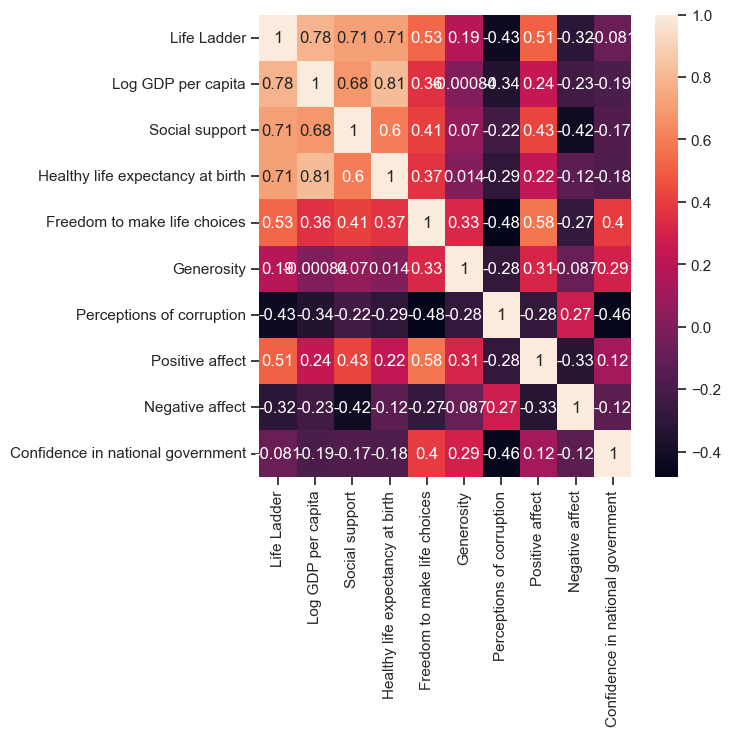

In [34]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(6,6))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_whp = sns.heatmap(sub.corr(), annot = True, ax = ax) 

The factors showing highest correlation with the Life Ladder score are: 
1. GDP: 0.78
2. Life expectancy: 0.73
3. Social support: 0.72 
4. Freedom to make life choices: 0.52
5. Positive affect: 0.51
6. Perceptions of corruption: -0.41
7. Negative affect: -0.33

Strongest intercorrelations: 
1. GDP/Life expectancy: 0.82
2. GDP/Social support: 0.68
3. Life expectancy/Social support: 0.61
4. Positive affect/Freedom to make life choices: 0.59
5. Freedom to make life choices/Perceptions of corruption: -0.47
6. Confidence in gov/Perceptions of corruption: -0.46
7. Social support/Negative affect: -0.45

The higher correlation score the stronger relationship there is between the variables. So GDP seems to have the strongest relationship with the final Happiness score - Life Ladder. On the negative side, the more people perceive corruption in their country, the lower are Happiness scores. 

Nothing unexpected or out of the ordinary in the high correlation numbers. It is known that wealthier countries have higher life expectancy. Interestingly, Generosity and Confidence in government seem to have little affect on Happiness scores. Confidence in government is an odd one altogether, especially in relationship to GDP (small, but negative? - more educated people question more, while less educated people in poor countries trust their governments blindly?)

Positive and negative affect have very similar relationship (positive or negative) with most other variables, except Life Ladder and Freedom to make life choices, where positive affect relationship is stronger. (GDP: pos/neg corr - 0.24/-0.25; Corruption: -0.28/0.28; but... Life Ladder: 0.51/-0.33 and Freedom: 0.59/-0.29). 

### 2.2 Creating scatterplots Q4

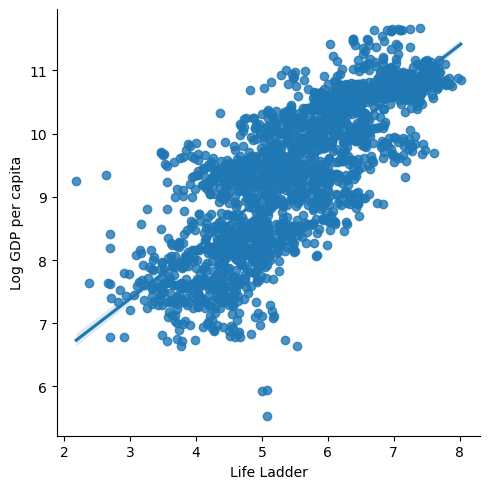

In [11]:
# Create a scatterplot for the "Life Ladder" and "Log GDP per capita" columns in seaborn

scatterplot_ladder_gdp = sns.lmplot(x = 'Life Ladder', y = 'Log GDP per capita', data = df_whp)

Strong linear relationship. Some outliers - very curious to check out who has such a high Life Ladder score having such a low GDP and also, who in average GDP camp feel so unhappy :)

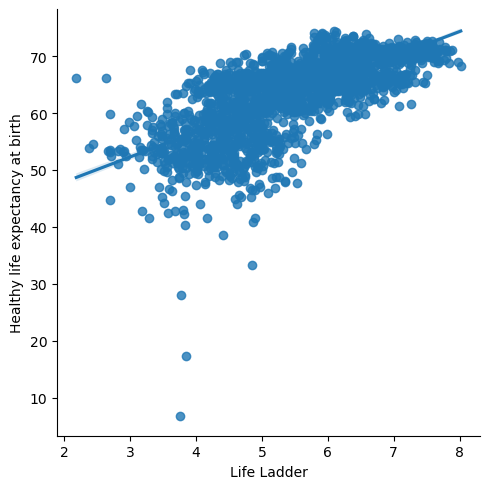

In [12]:
# Create a scatterplot for the "Life Ladder" and "Healthy life expectancy at birth" columns in seaborn

scatterplot_ladder_health = sns.lmplot(x = 'Life Ladder', y = 'Healthy life expectancy at birth', data = df_whp)

While dots are almost closer to the line than GDP plot, the line is less steep, which means the relationship is not as strong. Here I know the outliers below 40y are from Haiti - from task 6.1 work. 

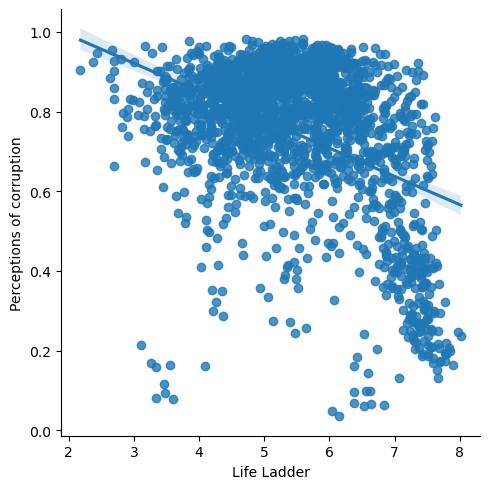

In [13]:
# Create a scatterplot for the "Life Ladder" and "Perceptions of corruption" columns in seaborn

scatterplot_ladder_corruption = sns.lmplot(x = 'Life Ladder', y = 'Perceptions of corruption', data = df_whp)

Again, weaker relationship that GDP, dots are much more scattered. Most countries with no perceived corruption seem to feel happier, however, high level of perception of corruption does not seem to influence happiness score much. Again, wondering which country feels quite unhappy, despite percention of no/low corruption (left lower corner cluster). 

### 2.3 Creating pair plot Q5

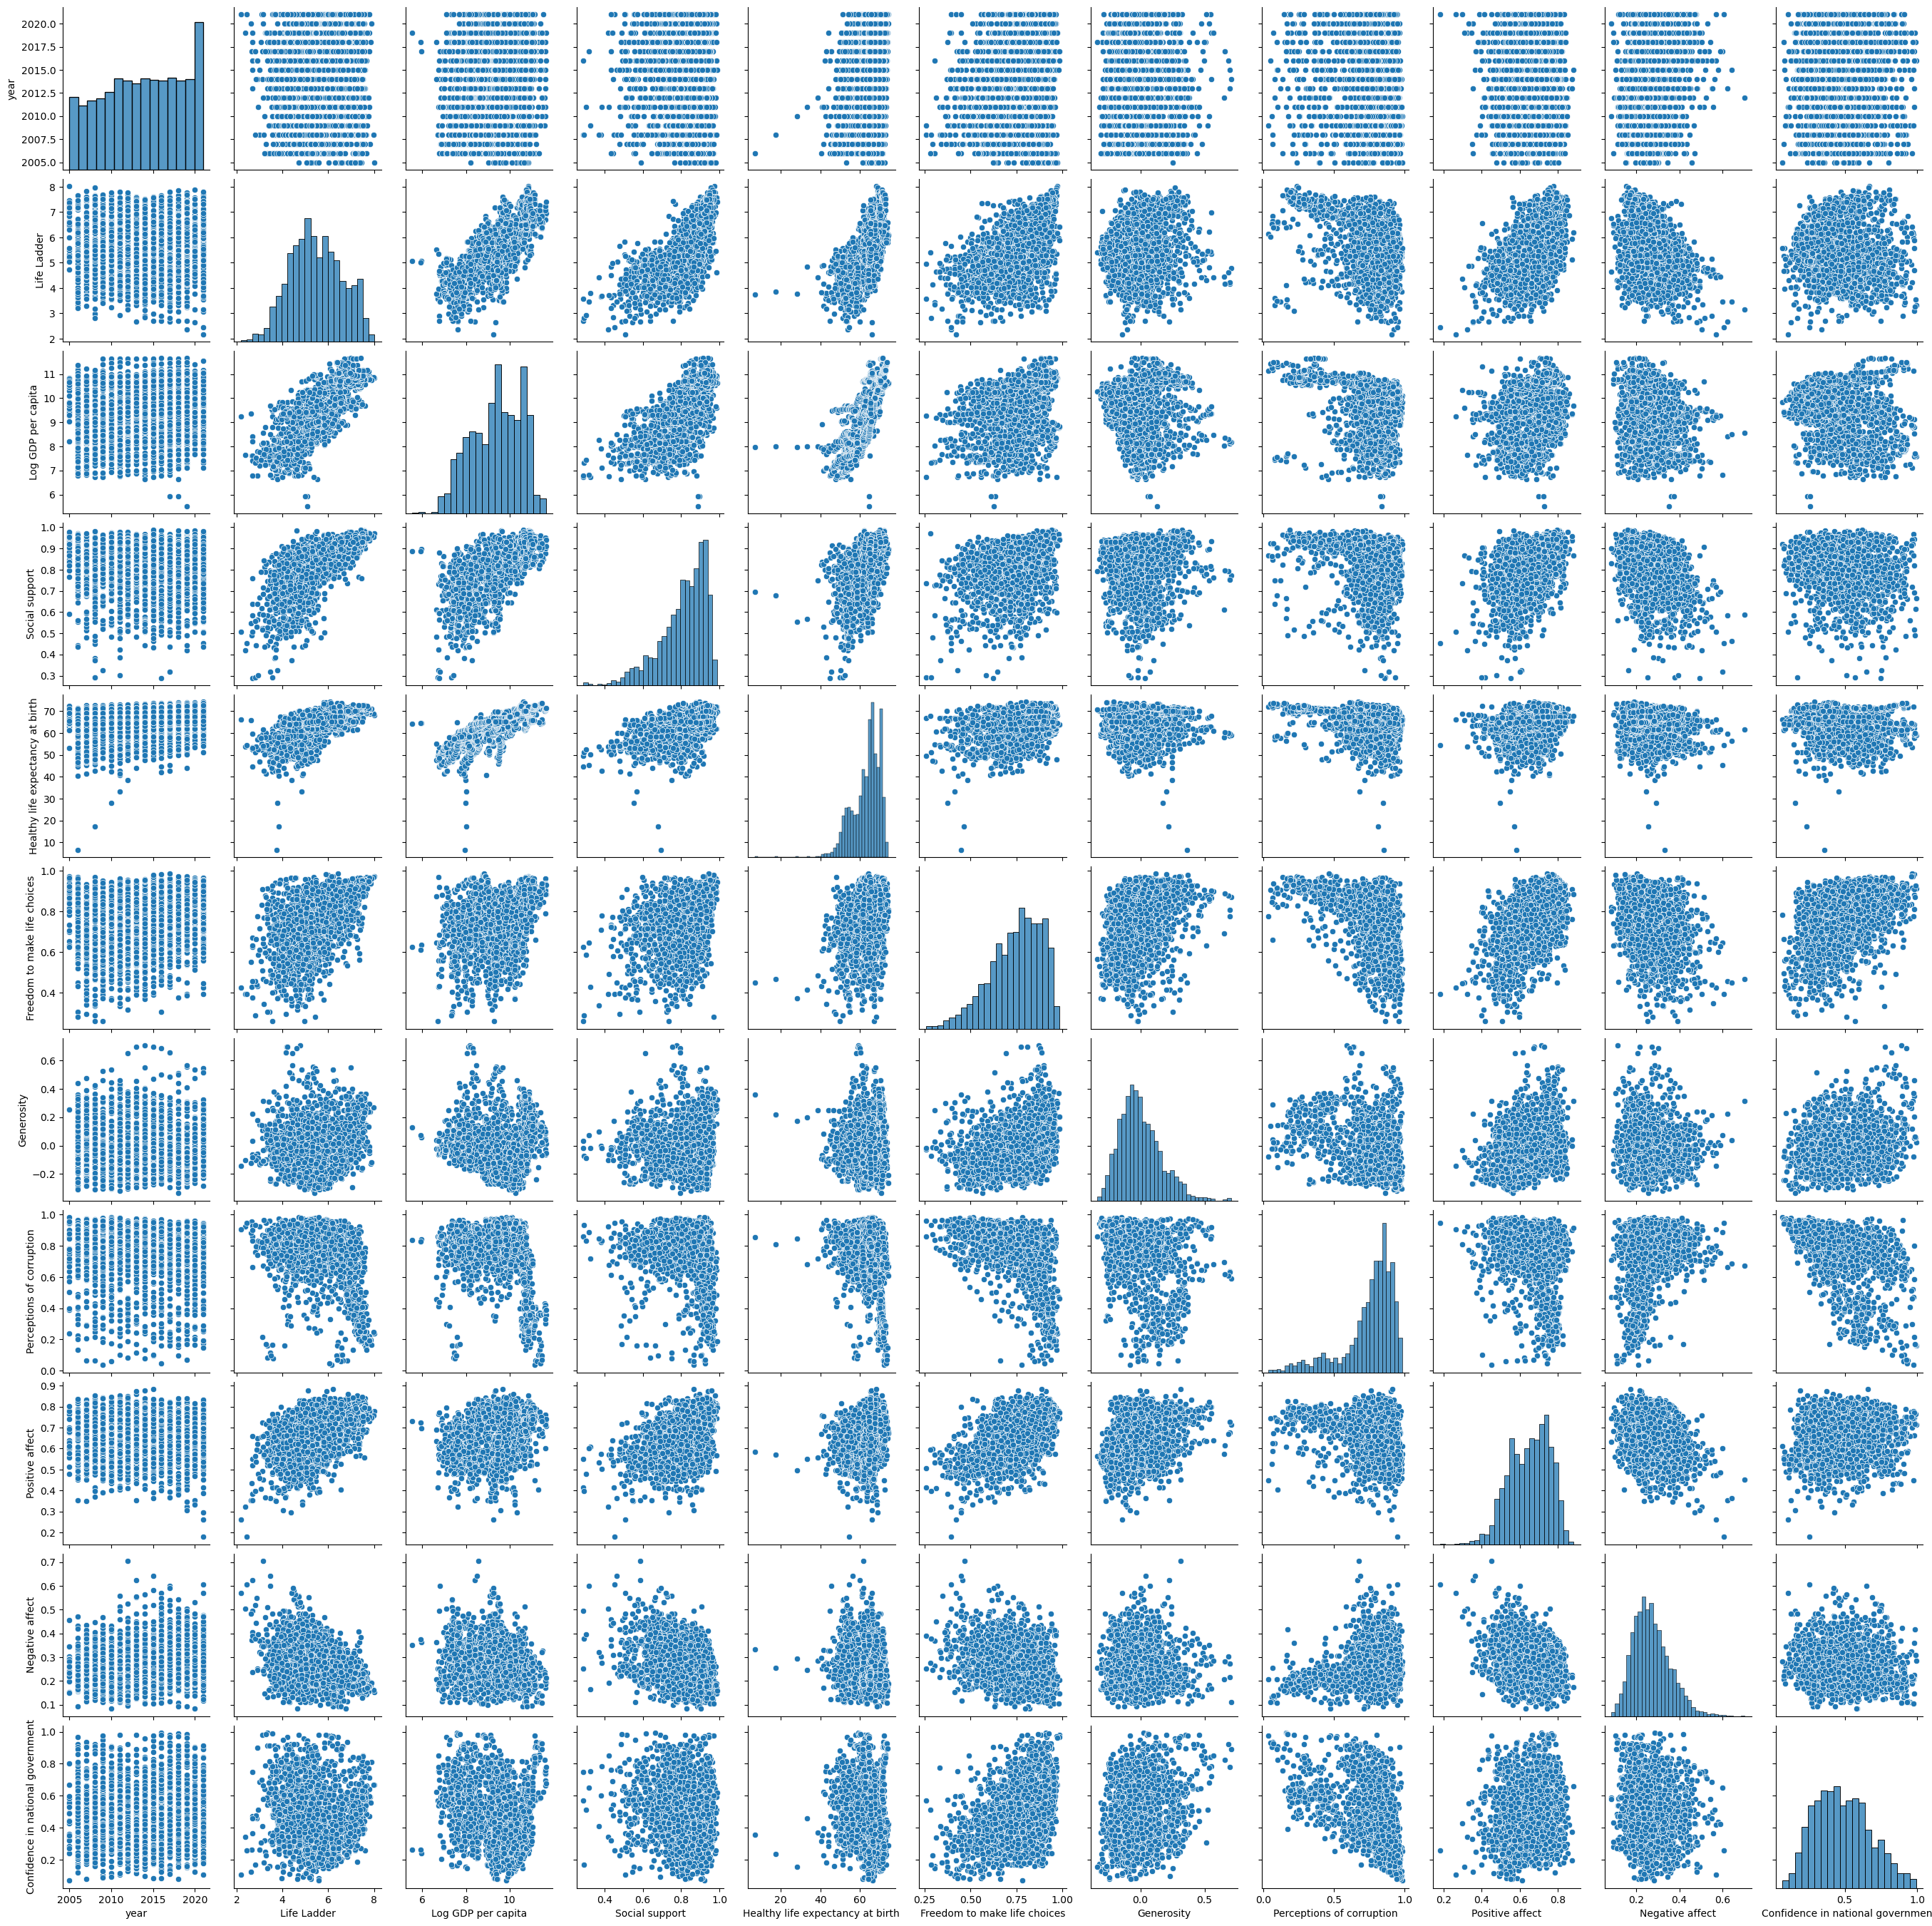

In [14]:
# Create a pair plot 

g_whp = sns.pairplot(df_whp)

Confidence in national government and Perceptions of corruption looks interesting, also Perceptions of corruption and Freedom to make life choices. From the picture, first (confidence/corruption) looks like much stronger relationship, but based on correlation numbers, freedom/corruption is higher. GDP/Generocity would be currios to see, as it is the lowest correlation score pair.  

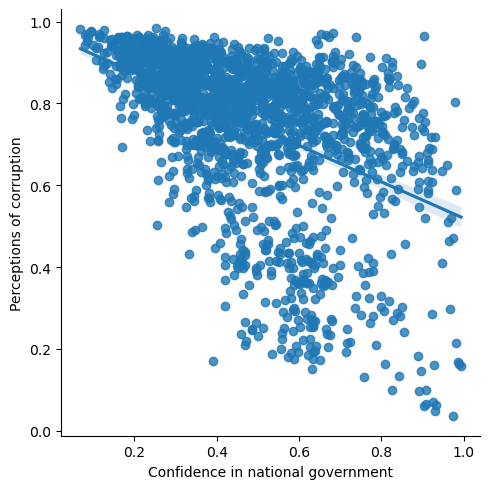

In [15]:
# Create a scatterplot for the "Confidence in national government" and "Perceptions of corruption" columns in seaborn

scatterplot_gov_corruption = sns.lmplot(x = 'Confidence in national government', y = 'Perceptions of corruption', data = df_whp)

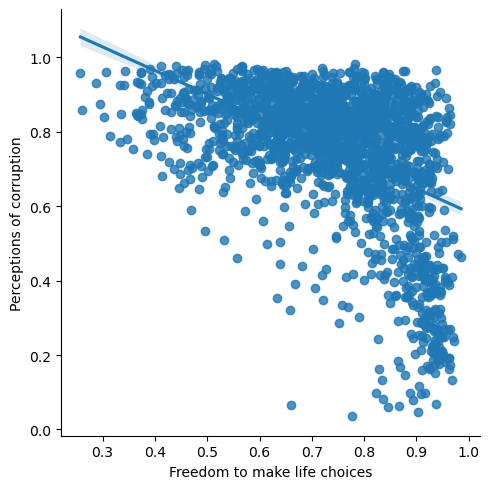

In [16]:
# Create a scatterplot for the "Freedom to make life choices" and "Perceptions of corruption" columns in seaborn

scatterplot_freedom_corruption = sns.lmplot(x = 'Freedom to make life choices', y = 'Perceptions of corruption', data = df_whp)

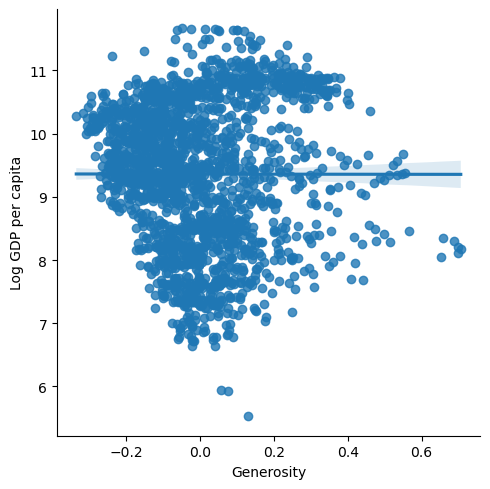

In [17]:
# Create a scatterplot for the "Generosity" and "Log GDP per capita" columns in seaborn

scatterplot_generosity_gdp = sns.lmplot(x = 'Generosity', y = 'Log GDP per capita', data = df_whp)

There seems to be no relationship between the wealth of a nation and generosity of its people :). Corruption and freedom relationship is interesting: there is no such thing as no corruption - no freedom, but if corruption is high, your freedom of choise would depend on which side of corruption you are on.

### 2.4 Creating a categorical plot Q6

<Axes: xlabel='Log GDP per capita', ylabel='Count'>

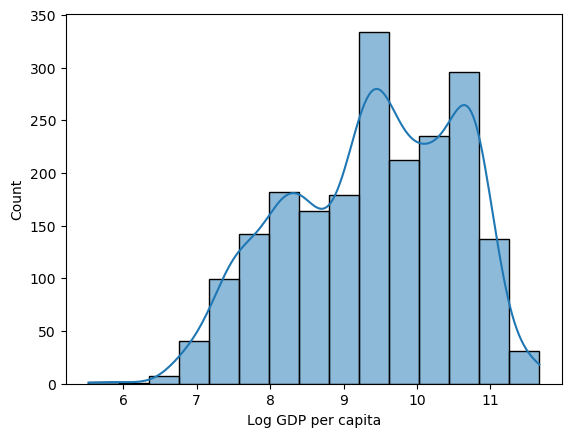

In [18]:
sns.histplot(df_whp['Log GDP per capita'], bins = 15, kde = True)

In [19]:
df_whp.loc[df_whp['Log GDP per capita'] < 8.5, 'GDP category'] = 'Low GDP'

In [20]:
df_whp.loc[(df_whp['Log GDP per capita'] >= 8.5) & (df_whp['Log GDP per capita'] < 10), 'GDP category'] = 'Average GDP'

In [21]:
df_whp.loc[df_whp['Log GDP per capita'] >= 10, 'GDP category'] = 'High GDP'

In [22]:
df_whp['GDP category'].value_counts(dropna = False)

Average GDP    815
High GDP       712
Low GDP        535
NaN             27
Name: GDP category, dtype: int64

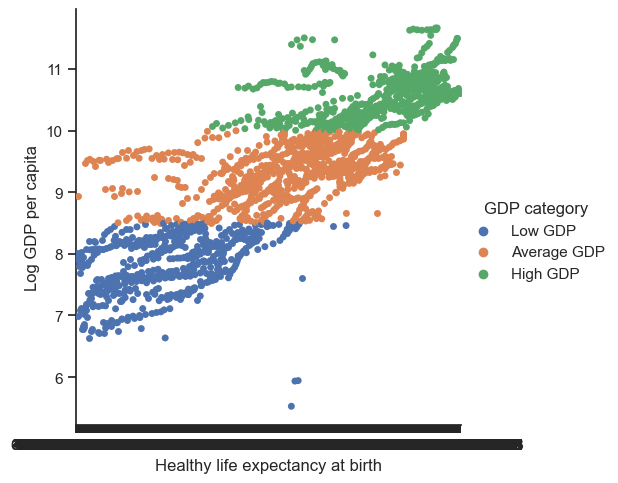

In [23]:
# Create a categorical plot in seaborn using the Happiness categories and GDP categories

sns.set(style="ticks")
g = sns.catplot(x="Healthy life expectancy at birth", y="Log GDP per capita", hue="GDP category", data=df_whp)

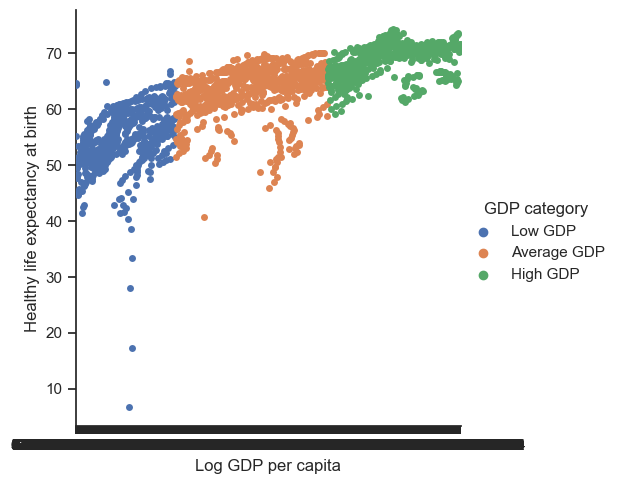

In [24]:
# Create a categorical plot in seaborn using the Happiness categories and GDP categories

sns.set(style="ticks")
g = sns.catplot(x="Log GDP per capita", y="Healthy life expectancy at birth", hue="GDP category", data=df_whp)

Q7: From my Task 6.1 questions, I could only answer the following: What factors are most/least correlated with the Life Ladder score? Which factors show highest/lowest intercorrelations? All answered earlier in the notebook. 

For new ideas, i was thinking to look not only how country rankings changed over the years, but also the actual score. Is there a difference between the two changes? If all countries got equally happier each year, the rankings would not change, but the scores would. 

Q8: 
1. When/if countries become wealthier (GDP grows), people report higher Life Ladder (Happiness) scores. 
2. When/if (perceived) corruption in the country declines, people report higher Life Ladder (Happiness) scores. 
3. Among the countries that moved up over 30 places in 10 years, confidence in national goverment changed/improvded more than perception of corruption. 
4. Over the years (let's say last 10) Life Ladder scores of ex-Soviet Union countries have increased. 

# 03 Saving files and graphs

In [25]:
scatterplot_ladder_gdp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_ladder_gdp.png'))

In [26]:
scatterplot_ladder_health.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_ladder_health.png'))

In [27]:
scatterplot_ladder_corruption.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_ladder_corruption.png'))

In [28]:
scatterplot_gov_corruption.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_gov_corruption.png'))

In [29]:
scatterplot_freedom_corruption.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_freedom_corruption.png'))

In [30]:
scatterplot_generosity_gdp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_generosity_gdp.png'))

In [33]:
g_whp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'g_whp.png'))

In [35]:
corr_whp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'corr_whp.png'))

In [32]:
df_whp.to_csv(os.path.join(path,'02 Data', 'Prepared Data', 'whp.csv'))